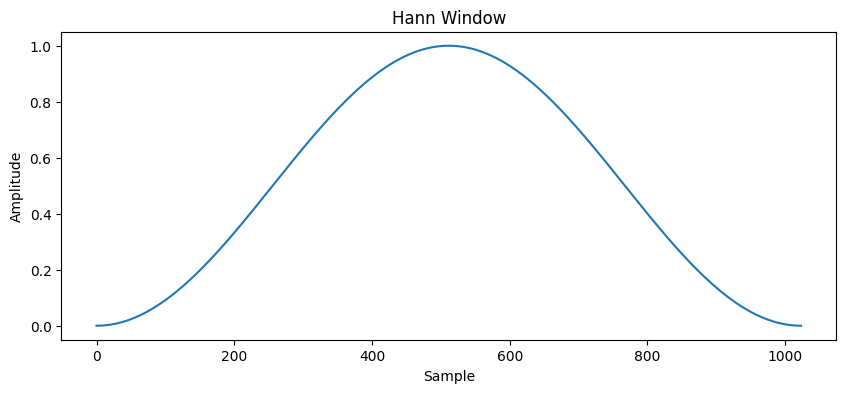

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a Hann window
N = 1024
hann_window = np.hanning(N)

plt.figure(figsize=(10, 4))
plt.plot(hann_window)
plt.title('Hann Window')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()


In [12]:
n_mels=64
duration = 10  # seconds
sample_rate = 48000
hop_length=480
n_fft=512

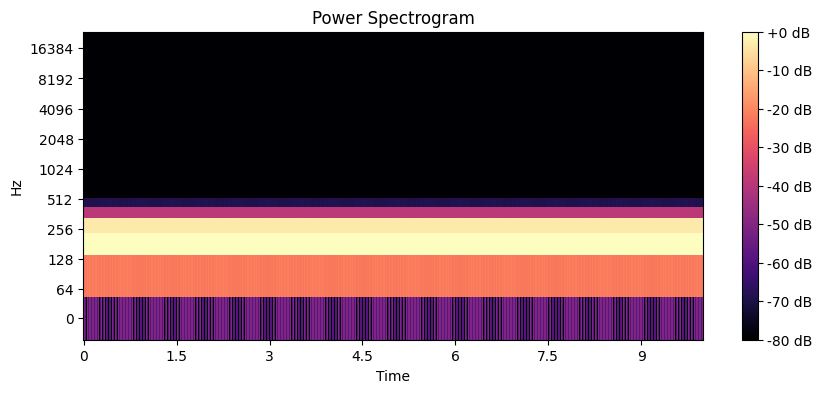

In [11]:
import librosa
import librosa.display

# Generate a sample signal
duration = 10  # seconds
sample_rate = 48000
hop_length=480
n_fft=512
t = np.linspace(0, duration, int(sample_rate*duration), endpoint=False)
x = 0.5*np.sin(2*np.pi*220*t)  # A 220 Hz sine wave

# Compute STFT
stft = librosa.stft(x, n_fft=n_fft, hop_length=hop_length, window='hann')
power_spectrogram = np.abs(stft)**2

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(power_spectrogram, ref=np.max),
                         sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='log')
plt.title('Power Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()


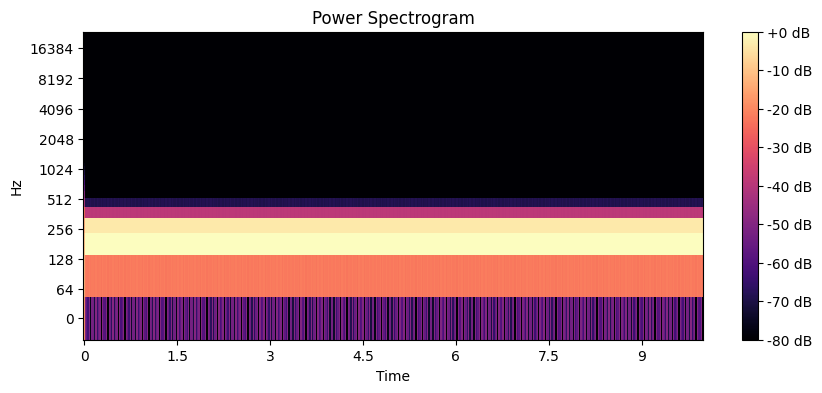

In [9]:
import librosa
import librosa.display

# Generate a sample signal
duration = 10  # seconds
sample_rate = 48000
hop_length=1024
n_fft=512
t = np.linspace(0, duration, int(sample_rate*duration), endpoint=False)
x = 0.5*np.sin(2*np.pi*220*t)  # A 220 Hz sine wave

# Compute STFT
stft = librosa.stft(x, n_fft=n_fft, hop_length=hop_length, window='hann')
power_spectrogram = np.abs(stft)**2

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(power_spectrogram, ref=np.max),
                         sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='log')
plt.title('Power Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

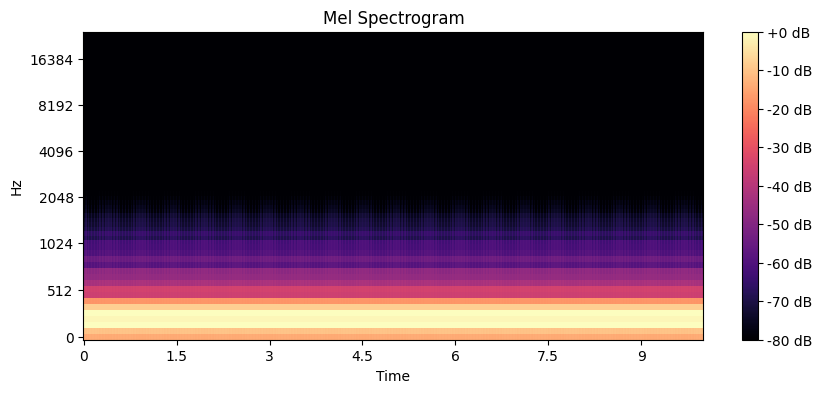

In [13]:
# Compute Mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(S=power_spectrogram, sr=sample_rate,
                                                 n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, fmax=14000)

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max),
                         sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()


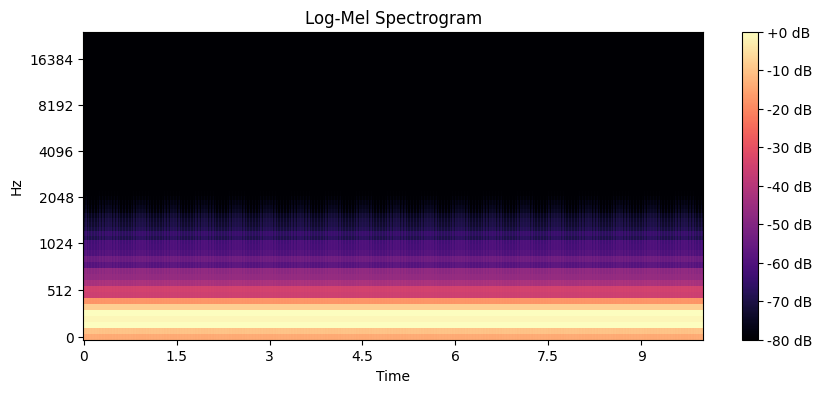

In [14]:
# Convert to log scale
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(log_mel_spectrogram, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.title('Log-Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()
